<a href="https://colab.research.google.com/github/sanmevv/Turkey-Earthquake-NLP-ML/blob/main/Preprocessing1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/MyDrive/


Mounted at /content/drive
'Colab Notebooks'     output.csv   sample_data		   'tweets (2).csv'
 complete1.csv	      over1.csv    sana.csv		    tweets.csv
 complete_final.csv   over2.csv    test_data.csv	    val_data.csv
 content.csv	      over3.csv    train_data.csv
 data.csv	      over4.csv    tweet_data_labeled.csv
 final.csv	      over.csv	   tweet_initial01


In [2]:
import pandas as pd

# Read the CSV file with ISO-8859-1 encoding
tweet_data = pd.read_csv('/content/drive/MyDrive/data.csv', encoding='ISO-8859-1', engine='python', error_bad_lines=False)




<ipython-input-2-9f6dcd8e3556>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  tweet_data = pd.read_csv('/content/drive/MyDrive/data.csv', encoding='ISO-8859-1', engine='python', error_bad_lines=False)


In [3]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839141 entries, 0 to 839140
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0.1  839141 non-null  int64  
 1   Tweet_id      839137 non-null  object 
 2   Date          839137 non-null  object 
 3   Tweet         839132 non-null  object 
 4   Source        839126 non-null  object 
 5   Language      839126 non-null  object 
 6   User_id       839126 non-null  float64
 7   Location      561502 non-null  object 
 8   Acctdesc      736592 non-null  object 
 9   Replies       838766 non-null  float64
 10  Retweets      838766 non-null  float64
 11  Likes         838766 non-null  float64
 12  Hashtags      838766 non-null  object 
 13  Following     838756 non-null  float64
 14  Followers     838756 non-null  float64
 15  Total_tweets  838756 non-null  float64
 16  Url           838756 non-null  object 
 17  Target        839141 non-null  bool   
 18  Unna

In [6]:
tweet_data = tweet_data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [7]:
tweet_data

,Tweet_id,Date,Tweet,Source,Language,User_id,Location,Acctdesc,Replies,Retweets,Likes,Hashtags,Following,Followers,Total_tweets,Url,Target
0,1644584329463361536,2023-04-08 06:13:53,Date and time (UTC): 04/08/2023 08:03:11 AM\nM...,Twitter Web App,en,1.001341e+18,Egypt,Gathering and tweeting the most recent earthqu...,0.0,0.0,0.0,"['#earthquake', '#USGS', '#CA', '#StaySafe']",160.0,40.0,95.0,https://twitter.com/Iwillsolo/status/164458432...,True
1,1644584192288735234,2023-04-08 06:13:20,#Earthquake (#å°é) M3.8 strikes 26 km NW of...,Twitter for Android,en,1.376006e+18,MÃ©xico,"InformaciÃ³n al instante, reportes sismicos, n...",0.0,0.0,0.0,"['#Earthquake', '#å°é', '#Saitama', '#Japan']",1432.0,979.0,60472.0,https://twitter.com/Edgaroficial02/status/1644...,True
2,1644584189789089792,2023-04-08 06:13:20,@Bergermeister23 Its a MEGA - Massive Earthqua...,Twitter Web App,en,1.510219e+18,NaN,NaN,0.0,0.0,0.0,[],177.0,100.0,20299.0,https://twitter.com/TUAtwit/status/16445841897...,True
3,1644584158218313729,2023-04-08 06:13:12,@_teawithtiff Lmao nah fr they go HARD and nee...,Twitter for iPhone,en,2.460890e+08,NaN,Poet ð |BLACK AF | RIP MOM & DAD ððâ...,0.0,0.0,0.0,[],3197.0,4285.0,103515.0,https://twitter.com/EarthQuake_HK15/status/164...,False
4,1644583869956648960,2023-04-08 06:12:04,89 Earthquake,Twitter for iPhone,en,7.928967e+17,NaN,do my own stunts | thetable.,0.0,0.0,0.0,[],460.0,528.0,33489.0,https://twitter.com/itsblanc0baby/status/16445...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839136,1645101084074205186,2023-04-09 16:27:17,@Shehnaazfc_usa @ishehnaaz_gill Prettyyyy \n\n...,Twitter for Android,en,1.598001e+18,NaN,Fan Account of \n#ShehnaazGill Ã¢ÂÂ¥Ã¯Â¸Â,0.0,2.0,3.0,[],10.0,18.0,1607.0,https://twitter.com/thalassophile54/status/164...,False
839137,1645101083612659713,2023-04-09 16:27:17,@IrvineWelsh Completely ruined the whole cultu...,Twitter for Android,en,1.417918e+18,NaN,Golfing tai chi..r,0.0,0.0,0.0,[],17.0,0.0,132.0,https://twitter.com/JohnFaw78768374/status/164...,False
839138,1645101072665526273,2023-04-09 16:27:14,@mazarek4 @LogKa11 Nato support definitely gav...,Twitter for Android,en,7.094763e+17,Nederland,Semi-pro at no lifing with grepolis.\nGo sprin...,0.0,0.0,0.0,[],34.0,13.0,2250.0,https://twitter.com/Gast_69/status/16451010726...,True
839139,1645101064482443266,2023-04-09 16:27:12,@iamyesyouareno Less of this,Twitter for iPhone,en,4.452020e+07,NaN,"NRA Life Member, Fiscally & Socially Conservat...",0.0,1.0,14.0,[],886.0,337.0,56813.0,https://twitter.com/khudsonUSA/status/16451010...,False


In [9]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 91.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 24.2 MB/s eta 0:00:00


In [10]:
# Most basic stuff for EDA.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Core packages for text processing.

import string
import re

# Libraries for text preprocessing.

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Loading some sklearn packaces for modelling.

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.metrics import f1_score, accuracy_score

# Some packages for word clouds and NER.

from wordcloud import WordCloud, STOPWORDS
from collections import Counter, defaultdict
from PIL import Image
import spacy
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.5/en_core_web_sm-2.2.5.tar.gz
import en_core_web_sm

# Core packages for general use throughout the notebook.

import random
import warnings
import time
import datetime

# For customizing our plots.

from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

# Loading pytorch packages.

import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, BertConfig, get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, random_split, DataLoader, RandomSampler, SequentialSampler

# Setting some options for general use.

stop = set(stopwords.words('english'))
plt.style.use('fivethirtyeight')
sns.set(font_scale=1.5)
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
warnings.filterwarnings('ignore')


#Setting seeds for consistent results.
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 34.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


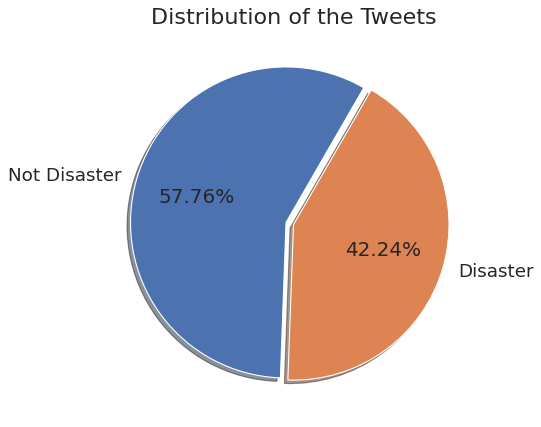

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6), dpi=80)

ax.pie(tweet_data['Target'].value_counts(),
       labels=['Not Disaster', 'Disaster'],
       autopct='%1.2f%%',
       shadow=True,
       explode=(0.05, 0),
       startangle=60)

ax.set_title('Distribution of the Tweets', fontsize=20)

plt.show()


In [16]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
trainv = pd.read_csv('/content/drive/MyDrive/train_data.csv')
testv = pd.read_csv('/content/drive/MyDrive/test_data.csv')

In [18]:
# Taking general look at the both datasets.
display(trainv.sample(5))

,Username,Tweet_id,Date,Tweet,Source,Language,User_id,Location,Acctdesc,Replies,Retweets,Likes,Hashtags,Following,Followers,Total_tweets,Url,Target,Unnamed: 0
516551,MightyOsamu,1637101903665594368.0,2023-03-18 14:41:24,Nuclear power is safe everywhere except for ea...,Twitter Web App,en,2.610657e+08,Japan,I love the smell of fish sauce in the morning.🍜,0.0,0.0,0.0,[],934.0,998.0,27565.0,https://twitter.com/MightyOsamu/status/1637101...,True,NaN
108419,ftg_soccer,1645097638868443136.0,2023-04-09 16:13:36,GOAL! Liverpool in England Premier League\nLiv...,live scores ftg,en,1.099404e+18,Lon,Live updates and previews for 100s of football...,0.0,0.0,0.0,[],1.0,6326.0,646946.0,https://twitter.com/ftg_soccer/status/16450976...,False,NaN
3121,AngelsBokenHalo,1643389217937190912,2023-04-04 23:04:56,Bay Area earthquake strikes near Hollister htt...,Twitter Web App,en,1.149687e+18,California,Live to learn. Learn to teach. Teach from the ...,0.0,6.0,10.0,[],547.0,6327.0,18220.0,https://twitter.com/AngelsBokenHalo/status/164...,True,NaN
291138,BCWildfireHelp,1632997285603983360,2023-03-07 06:51:07,Solar wind not quite ready to come down; pumpi...,Twitter Web App,en,8.841305e+17,"West Coast, North America",#FireTwitter since 2017 | Retweet Hub | fire +...,0.0,0.0,1.0,"['#earthquake', '#solarwind']",5209.0,6982.0,104644.0,https://twitter.com/BCWildfireHelp/status/1632...,True,NaN
427657,Lupublicoutcry,1636479622924881920.0,2023-03-16 21:28:41,"@goddeketal @GretaThunberg Like I said, right ...",Twitter for Android,en,1.621617e+18,NaN,Question everything and everyone,0.0,0.0,0.0,[],697.0,162.0,1540.0,https://twitter.com/Lupublicoutcry/status/1636...,True,41550.0


In [19]:
display(testv.sample(5))

,Username,Tweet_id,Date,Tweet,Source,Language,User_id,Location,Acctdesc,Replies,Retweets,Likes,Hashtags,Following,Followers,Total_tweets,Url,Target,Unnamed: 0
67831,secular_girl,1.640901e+18,2023-03-29 02:16:27,Alberta's Oil Patch Regulator Changes Tune on ...,Twitter Web App,en,8.240127e+17,"#NorthShuswap, BC",#Science is my God. email: liesmycountrytoldme...,1.0,0.0,0.0,[],2278.0,1078.0,65948.0,https://twitter.com/secular_girl/status/164090...,True,NaN
5056,MikeAda79075184,1.645176e+18,2023-04-09 21:23:21,@DylanBregman Difference between yesterday and...,Twitter for iPhone,en,1.352732e+18,NaN,Gsbout,0.0,0.0,0.0,[],111.0,50.0,679.0,https://twitter.com/MikeAda79075184/status/164...,False,NaN
77815,FreeBraveUSA76,1.645201e+18,2023-04-09 23:02:28,@johncardillo Oops https://t.co/ToGP9gI8Qn,Twitter for iPhone,en,8.818323e+17,"Ohio, USA",In God We Trust.,0.0,0.0,0.0,[],520.0,115.0,5902.0,https://twitter.com/FreeBraveUSA76/status/1645...,False,NaN
12473,BaigsonAuction,1.630500e+18,2023-02-28 09:29:08,Planetary &amp; Seismic Update 27 February 202...,Twitter Web App,en,1.489815e+18,United States,"Antiquarian, FGA. DGA. Sufi .Art restoration.G...",0.0,1.0,3.0,[],9544.0,17507.0,1737.0,https://twitter.com/BaigsonAuction/status/1630...,True,NaN
45568,nsemgh,1.638417e+18,2023-03-22 05:45:55,Earthquake of 6.5m hit Afghanistan and Pakista...,Nsemgh.com,en,1.100089e+18,NaN,For your authentic news ...you can depend on n...,0.0,0.0,0.0,[],66.0,52.0,12164.0,https://twitter.com/nsemgh/status/163841669694...,True,NaN


In [20]:
# Checking observation and feature numbers for train and test data.

print(trainv.shape)
print(testv.shape)

(614980, 19)
(85415, 19)


In [21]:
trainv['Tweet'] = trainv['Tweet'].astype(str)


Cleaning Text

In [22]:
trainv['Tweet'] = trainv['Tweet'].fillna('')


In [23]:
# Some basic helper functions to clean text by removing urls, emojis, html tags and punctuations.

def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)


def remove_emoji(text):
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


def remove_html(text):
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return re.sub(html, '', text)


def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Applying helper functions

trainv['Tweet_clean'] = trainv['Tweet'].apply(lambda x: remove_URL(x))
trainv['Tweet_clean'] = trainv['Tweet_clean'].apply(lambda x: remove_emoji(x))
trainv['Tweet_clean'] = trainv['Tweet_clean'].apply(lambda x: remove_html(x))
trainv['Tweet_clean'] = trainv['Tweet_clean'].apply(lambda x: remove_punct(x))

In [24]:
# Tokenizing the tweet base texts.

trainv['Tokenized'] = trainv['Tweet_clean'].apply(word_tokenize)

trainv.head()

,Username,Tweet_id,Date,Tweet,Source,Language,User_id,Location,Acctdesc,Replies,Retweets,Likes,Hashtags,Following,Followers,Total_tweets,Url,Target,Unnamed: 0,Tweet_clean,Tokenized
0,LarryBMelman,1645216537865846790,2023-04-10 00:06:03,"@islandgirlyme I hope somebody out there, plea...",Twitter Web App,en,1.594003e+18,Here and there.,Make the world a better place by arguing nonse...,1.0,2.0,10.0,[],1517.0,576.0,9346.0,https://twitter.com/LarryBMelman/status/164521...,False,NaN,islandgirlyme I hope somebody out there please...,"[islandgirlyme, I, hope, somebody, out, there,..."
1,new_earthquakes,1632990833916911616,2023-03-07 06:25:28,"⌚ 2023.03.07 06:02 (gmt)\n🏠 03.07 14:02, 2...",🌐 Last Earthquakes by @Serkalac,en,2.669389e+09,Earth,Latest Earthquake Notification ...,0.0,0.0,0.0,"['#earthquake', '#sanmariano', '#philippines']",32.0,1572.0,2347.0,https://twitter.com/new_earthquakes/status/163...,True,NaN,⌚ 20230307 0602 gmt\n 0307 1402 24℃75℉ \n ...,"[⌚, 20230307, 0602, gmt, 0307, 1402, 24℃75℉, 6..."
2,uygulayimcierki,1628705361090777088,2023-02-23 10:36:32,@roeda62990272 @enginalbayrak @Cristiano @AlNa...,Twitter for Android,en,1.379535e+18,NaN,Parody account. Profil fotoğrafı yapay zeka il...,0.0,0.0,0.0,[],55.0,17.0,404.0,https://twitter.com/uygulayimcierki/status/162...,True,NaN,roeda62990272 enginalbayrak Cristiano AlNassrF...,"[roeda62990272, enginalbayrak, Cristiano, AlNa..."
3,Nfthuntguy,1645356478121771010,2023-04-10 09:22:08,@MascotOgbe @F_oye93 @iamtokstesla @DavidHunde...,Twitter for iPhone,en,1.547281e+18,NaN,NFT is fun ð¤© discord : Rahzcarter#1307,1.0,0.0,0.0,[],2330.0,666.0,38822.0,https://twitter.com/Nfthuntguy/status/16453564...,False,NaN,MascotOgbe Foye93 iamtokstesla DavidHundeyin S...,"[MascotOgbe, Foye93, iamtokstesla, DavidHundey..."
4,ForcesNews,1628469679877390341,2023-02-22 19:00:01,There are currently between 100 and 150 Britis...,Twitter for Advertisers,en,1.136462e+08,NaN,The latest stories from the military world.🌍 S...,0.0,0.0,5.0,['#ForcesNews'],1184.0,96431.0,47280.0,https://twitter.com/ForcesNews/status/16284696...,True,NaN,There are currently between 100 and 150 Britis...,"[There, are, currently, between, 100, and, 150..."


In [25]:
# Lower casing clean text.

trainv['Lower'] = trainv['Tokenized'].apply(
    lambda x: [word.lower() for word in x])

trainv.head()

,Username,Tweet_id,Date,Tweet,Source,Language,User_id,Location,Acctdesc,Replies,Retweets,Likes,Hashtags,Following,Followers,Total_tweets,Url,Target,Unnamed: 0,Tweet_clean,Tokenized,Lower
0,LarryBMelman,1645216537865846790,2023-04-10 00:06:03,"@islandgirlyme I hope somebody out there, plea...",Twitter Web App,en,1.594003e+18,Here and there.,Make the world a better place by arguing nonse...,1.0,2.0,10.0,[],1517.0,576.0,9346.0,https://twitter.com/LarryBMelman/status/164521...,False,NaN,islandgirlyme I hope somebody out there please...,"[islandgirlyme, I, hope, somebody, out, there,...","[islandgirlyme, i, hope, somebody, out, there,..."
1,new_earthquakes,1632990833916911616,2023-03-07 06:25:28,"⌚ 2023.03.07 06:02 (gmt)\n🏠 03.07 14:02, 2...",🌐 Last Earthquakes by @Serkalac,en,2.669389e+09,Earth,Latest Earthquake Notification ...,0.0,0.0,0.0,"['#earthquake', '#sanmariano', '#philippines']",32.0,1572.0,2347.0,https://twitter.com/new_earthquakes/status/163...,True,NaN,⌚ 20230307 0602 gmt\n 0307 1402 24℃75℉ \n ...,"[⌚, 20230307, 0602, gmt, 0307, 1402, 24℃75℉, 6...","[⌚, 20230307, 0602, gmt, 0307, 1402, 24℃75℉, 6..."
2,uygulayimcierki,1628705361090777088,2023-02-23 10:36:32,@roeda62990272 @enginalbayrak @Cristiano @AlNa...,Twitter for Android,en,1.379535e+18,NaN,Parody account. Profil fotoğrafı yapay zeka il...,0.0,0.0,0.0,[],55.0,17.0,404.0,https://twitter.com/uygulayimcierki/status/162...,True,NaN,roeda62990272 enginalbayrak Cristiano AlNassrF...,"[roeda62990272, enginalbayrak, Cristiano, AlNa...","[roeda62990272, enginalbayrak, cristiano, alna..."
3,Nfthuntguy,1645356478121771010,2023-04-10 09:22:08,@MascotOgbe @F_oye93 @iamtokstesla @DavidHunde...,Twitter for iPhone,en,1.547281e+18,NaN,NFT is fun ð¤© discord : Rahzcarter#1307,1.0,0.0,0.0,[],2330.0,666.0,38822.0,https://twitter.com/Nfthuntguy/status/16453564...,False,NaN,MascotOgbe Foye93 iamtokstesla DavidHundeyin S...,"[MascotOgbe, Foye93, iamtokstesla, DavidHundey...","[mascotogbe, foye93, iamtokstesla, davidhundey..."
4,ForcesNews,1628469679877390341,2023-02-22 19:00:01,There are currently between 100 and 150 Britis...,Twitter for Advertisers,en,1.136462e+08,NaN,The latest stories from the military world.🌍 S...,0.0,0.0,5.0,['#ForcesNews'],1184.0,96431.0,47280.0,https://twitter.com/ForcesNews/status/16284696...,True,NaN,There are currently between 100 and 150 Britis...,"[There, are, currently, between, 100, and, 150...","[there, are, currently, between, 100, and, 150..."


In [26]:
# Removing stopwords.

trainv['Stopwords_removed'] = trainv['Lower'].apply(
    lambda x: [word for word in x if word not in stop])

trainv.head()

,Username,Tweet_id,Date,Tweet,Source,Language,User_id,Location,Acctdesc,Replies,Retweets,Likes,Hashtags,Following,Followers,Total_tweets,Url,Target,Unnamed: 0,Tweet_clean,Tokenized,Lower,Stopwords_removed
0,LarryBMelman,1645216537865846790,2023-04-10 00:06:03,"@islandgirlyme I hope somebody out there, plea...",Twitter Web App,en,1.594003e+18,Here and there.,Make the world a better place by arguing nonse...,1.0,2.0,10.0,[],1517.0,576.0,9346.0,https://twitter.com/LarryBMelman/status/164521...,False,NaN,islandgirlyme I hope somebody out there please...,"[islandgirlyme, I, hope, somebody, out, there,...","[islandgirlyme, i, hope, somebody, out, there,...","[islandgirlyme, hope, somebody, please, somebo..."
1,new_earthquakes,1632990833916911616,2023-03-07 06:25:28,"⌚ 2023.03.07 06:02 (gmt)\n🏠 03.07 14:02, 2...",🌐 Last Earthquakes by @Serkalac,en,2.669389e+09,Earth,Latest Earthquake Notification ...,0.0,0.0,0.0,"['#earthquake', '#sanmariano', '#philippines']",32.0,1572.0,2347.0,https://twitter.com/new_earthquakes/status/163...,True,NaN,⌚ 20230307 0602 gmt\n 0307 1402 24℃75℉ \n ...,"[⌚, 20230307, 0602, gmt, 0307, 1402, 24℃75℉, 6...","[⌚, 20230307, 0602, gmt, 0307, 1402, 24℃75℉, 6...","[⌚, 20230307, 0602, gmt, 0307, 1402, 24℃75℉, 6..."
2,uygulayimcierki,1628705361090777088,2023-02-23 10:36:32,@roeda62990272 @enginalbayrak @Cristiano @AlNa...,Twitter for Android,en,1.379535e+18,NaN,Parody account. Profil fotoğrafı yapay zeka il...,0.0,0.0,0.0,[],55.0,17.0,404.0,https://twitter.com/uygulayimcierki/status/162...,True,NaN,roeda62990272 enginalbayrak Cristiano AlNassrF...,"[roeda62990272, enginalbayrak, Cristiano, AlNa...","[roeda62990272, enginalbayrak, cristiano, alna...","[roeda62990272, enginalbayrak, cristiano, alna..."
3,Nfthuntguy,1645356478121771010,2023-04-10 09:22:08,@MascotOgbe @F_oye93 @iamtokstesla @DavidHunde...,Twitter for iPhone,en,1.547281e+18,NaN,NFT is fun ð¤© discord : Rahzcarter#1307,1.0,0.0,0.0,[],2330.0,666.0,38822.0,https://twitter.com/Nfthuntguy/status/16453564...,False,NaN,MascotOgbe Foye93 iamtokstesla DavidHundeyin S...,"[MascotOgbe, Foye93, iamtokstesla, DavidHundey...","[mascotogbe, foye93, iamtokstesla, davidhundey...","[mascotogbe, foye93, iamtokstesla, davidhundey..."
4,ForcesNews,1628469679877390341,2023-02-22 19:00:01,There are currently between 100 and 150 Britis...,Twitter for Advertisers,en,1.136462e+08,NaN,The latest stories from the military world.🌍 S...,0.0,0.0,5.0,['#ForcesNews'],1184.0,96431.0,47280.0,https://twitter.com/ForcesNews/status/16284696...,True,NaN,There are currently between 100 and 150 Britis...,"[There, are, currently, between, 100, and, 150...","[there, are, currently, between, 100, and, 150...","[currently, 100, 150, british, personnel, grou..."


In [27]:
# Applying part of speech tags.

trainv['Pos_tags'] = trainv['Stopwords_removed'].apply(nltk.tag.pos_tag)

trainv.head()


,Username,Tweet_id,Date,Tweet,Source,Language,User_id,Location,Acctdesc,Replies,Retweets,Likes,Hashtags,Following,Followers,Total_tweets,Url,Target,Unnamed: 0,Tweet_clean,Tokenized,Lower,Stopwords_removed,Pos_tags
0,LarryBMelman,1645216537865846790,2023-04-10 00:06:03,"@islandgirlyme I hope somebody out there, plea...",Twitter Web App,en,1.594003e+18,Here and there.,Make the world a better place by arguing nonse...,1.0,2.0,10.0,[],1517.0,576.0,9346.0,https://twitter.com/LarryBMelman/status/164521...,False,NaN,islandgirlyme I hope somebody out there please...,"[islandgirlyme, I, hope, somebody, out, there,...","[islandgirlyme, i, hope, somebody, out, there,...","[islandgirlyme, hope, somebody, please, somebo...","[(islandgirlyme, NNS), (hope, VBP), (somebody,..."
1,new_earthquakes,1632990833916911616,2023-03-07 06:25:28,"⌚ 2023.03.07 06:02 (gmt)\n🏠 03.07 14:02, 2...",🌐 Last Earthquakes by @Serkalac,en,2.669389e+09,Earth,Latest Earthquake Notification ...,0.0,0.0,0.0,"['#earthquake', '#sanmariano', '#philippines']",32.0,1572.0,2347.0,https://twitter.com/new_earthquakes/status/163...,True,NaN,⌚ 20230307 0602 gmt\n 0307 1402 24℃75℉ \n ...,"[⌚, 20230307, 0602, gmt, 0307, 1402, 24℃75℉, 6...","[⌚, 20230307, 0602, gmt, 0307, 1402, 24℃75℉, 6...","[⌚, 20230307, 0602, gmt, 0307, 1402, 24℃75℉, 6...","[(⌚, RB), (20230307, CD), (0602, CD), (gmt, NN..."
2,uygulayimcierki,1628705361090777088,2023-02-23 10:36:32,@roeda62990272 @enginalbayrak @Cristiano @AlNa...,Twitter for Android,en,1.379535e+18,NaN,Parody account. Profil fotoğrafı yapay zeka il...,0.0,0.0,0.0,[],55.0,17.0,404.0,https://twitter.com/uygulayimcierki/status/162...,True,NaN,roeda62990272 enginalbayrak Cristiano AlNassrF...,"[roeda62990272, enginalbayrak, Cristiano, AlNa...","[roeda62990272, enginalbayrak, cristiano, alna...","[roeda62990272, enginalbayrak, cristiano, alna...","[(roeda62990272, NN), (enginalbayrak, NN), (cr..."
3,Nfthuntguy,1645356478121771010,2023-04-10 09:22:08,@MascotOgbe @F_oye93 @iamtokstesla @DavidHunde...,Twitter for iPhone,en,1.547281e+18,NaN,NFT is fun ð¤© discord : Rahzcarter#1307,1.0,0.0,0.0,[],2330.0,666.0,38822.0,https://twitter.com/Nfthuntguy/status/16453564...,False,NaN,MascotOgbe Foye93 iamtokstesla DavidHundeyin S...,"[MascotOgbe, Foye93, iamtokstesla, DavidHundey...","[mascotogbe, foye93, iamtokstesla, davidhundey...","[mascotogbe, foye93, iamtokstesla, davidhundey...","[(mascotogbe, NN), (foye93, NN), (iamtokstesla..."
4,ForcesNews,1628469679877390341,2023-02-22 19:00:01,There are currently between 100 and 150 Britis...,Twitter for Advertisers,en,1.136462e+08,NaN,The latest stories from the military world.🌍 S...,0.0,0.0,5.0,['#ForcesNews'],1184.0,96431.0,47280.0,https://twitter.com/ForcesNews/status/16284696...,True,NaN,There are currently between 100 and 150 Britis...,"[There, are, currently, between, 100, and, 150...","[there, are, currently, between, 100, and, 150...","[currently, 100, 150, british, personnel, grou...","[(currently, RB), (100, CD), (150, CD), (briti..."


In [28]:
# Converting part of speeches to wordnet format.
import nltk
nltk.download('omw-1.4')

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


trainv['Wordnet_pos'] = trainv['Pos_tags'].apply(
    lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

trainv.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,Username,Tweet_id,Date,Tweet,Source,Language,User_id,Location,Acctdesc,Replies,Retweets,Likes,Hashtags,Following,Followers,Total_tweets,Url,Target,Unnamed: 0,Tweet_clean,Tokenized,Lower,Stopwords_removed,Pos_tags,Wordnet_pos
0,LarryBMelman,1645216537865846790,2023-04-10 00:06:03,"@islandgirlyme I hope somebody out there, plea...",Twitter Web App,en,1.594003e+18,Here and there.,Make the world a better place by arguing nonse...,1.0,2.0,10.0,[],1517.0,576.0,9346.0,https://twitter.com/LarryBMelman/status/164521...,False,NaN,islandgirlyme I hope somebody out there please...,"[islandgirlyme, I, hope, somebody, out, there,...","[islandgirlyme, i, hope, somebody, out, there,...","[islandgirlyme, hope, somebody, please, somebo...","[(islandgirlyme, NNS), (hope, VBP), (somebody,...","[(islandgirlyme, n), (hope, v), (somebody, n),..."
1,new_earthquakes,1632990833916911616,2023-03-07 06:25:28,"⌚ 2023.03.07 06:02 (gmt)\n🏠 03.07 14:02, 2...",🌐 Last Earthquakes by @Serkalac,en,2.669389e+09,Earth,Latest Earthquake Notification ...,0.0,0.0,0.0,"['#earthquake', '#sanmariano', '#philippines']",32.0,1572.0,2347.0,https://twitter.com/new_earthquakes/status/163...,True,NaN,⌚ 20230307 0602 gmt\n 0307 1402 24℃75℉ \n ...,"[⌚, 20230307, 0602, gmt, 0307, 1402, 24℃75℉, 6...","[⌚, 20230307, 0602, gmt, 0307, 1402, 24℃75℉, 6...","[⌚, 20230307, 0602, gmt, 0307, 1402, 24℃75℉, 6...","[(⌚, RB), (20230307, CD), (0602, CD), (gmt, NN...","[(⌚, r), (20230307, n), (0602, n), (gmt, n), (..."
2,uygulayimcierki,1628705361090777088,2023-02-23 10:36:32,@roeda62990272 @enginalbayrak @Cristiano @AlNa...,Twitter for Android,en,1.379535e+18,NaN,Parody account. Profil fotoğrafı yapay zeka il...,0.0,0.0,0.0,[],55.0,17.0,404.0,https://twitter.com/uygulayimcierki/status/162...,True,NaN,roeda62990272 enginalbayrak Cristiano AlNassrF...,"[roeda62990272, enginalbayrak, Cristiano, AlNa...","[roeda62990272, enginalbayrak, cristiano, alna...","[roeda62990272, enginalbayrak, cristiano, alna...","[(roeda62990272, NN), (enginalbayrak, NN), (cr...","[(roeda62990272, n), (enginalbayrak, n), (cris..."
3,Nfthuntguy,1645356478121771010,2023-04-10 09:22:08,@MascotOgbe @F_oye93 @iamtokstesla @DavidHunde...,Twitter for iPhone,en,1.547281e+18,NaN,NFT is fun ð¤© discord : Rahzcarter#1307,1.0,0.0,0.0,[],2330.0,666.0,38822.0,https://twitter.com/Nfthuntguy/status/16453564...,False,NaN,MascotOgbe Foye93 iamtokstesla DavidHundeyin S...,"[MascotOgbe, Foye93, iamtokstesla, DavidHundey...","[mascotogbe, foye93, iamtokstesla, davidhundey...","[mascotogbe, foye93, iamtokstesla, davidhundey...","[(mascotogbe, NN), (foye93, NN), (iamtokstesla...","[(mascotogbe, n), (foye93, n), (iamtokstesla, ..."
4,ForcesNews,1628469679877390341,2023-02-22 19:00:01,There are currently between 100 and 150 Britis...,Twitter for Advertisers,en,1.136462e+08,NaN,The latest stories from the military world.🌍 S...,0.0,0.0,5.0,['#ForcesNews'],1184.0,96431.0,47280.0,https://twitter.com/ForcesNews/status/16284696...,True,NaN,There are currently between 100 and 150 Britis...,"[There, are, currently, between, 100, and, 150...","[there, are, currently, between, 100, and, 150...","[currently, 100, 150, british, personnel, grou...","[(currently, RB), (100, CD), (150, CD), (briti...","[(currently, r), (100, n), (150, n), (british,..."


In [29]:
# Applying word lemmatizer.

wnl = WordNetLemmatizer()

trainv['Lemmatized'] = trainv['Wordnet_pos'].apply(
    lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

trainv['Lemmatized'] = trainv['Lemmatized'].apply(
    lambda x: [word for word in x if word not in stop])

trainv['Lemma_str'] = [' '.join(map(str, l)) for l in trainv['Lemmatized']]

trainv.head()

,Username,Tweet_id,Date,Tweet,Source,Language,User_id,Location,Acctdesc,Replies,Retweets,Likes,Hashtags,Following,Followers,Total_tweets,Url,Target,Unnamed: 0,Tweet_clean,Tokenized,Lower,Stopwords_removed,Pos_tags,Wordnet_pos,Lemmatized,Lemma_str
0,LarryBMelman,1645216537865846790,2023-04-10 00:06:03,"@islandgirlyme I hope somebody out there, plea...",Twitter Web App,en,1.594003e+18,Here and there.,Make the world a better place by arguing nonse...,1.0,2.0,10.0,[],1517.0,576.0,9346.0,https://twitter.com/LarryBMelman/status/164521...,False,NaN,islandgirlyme I hope somebody out there please...,"[islandgirlyme, I, hope, somebody, out, there,...","[islandgirlyme, i, hope, somebody, out, there,...","[islandgirlyme, hope, somebody, please, somebo...","[(islandgirlyme, NNS), (hope, VBP), (somebody,...","[(islandgirlyme, n), (hope, v), (somebody, n),...","[islandgirlyme, hope, somebody, please, somebo...",islandgirlyme hope somebody please somebody sa...
1,new_earthquakes,1632990833916911616,2023-03-07 06:25:28,"⌚ 2023.03.07 06:02 (gmt)\n🏠 03.07 14:02, 2...",🌐 Last Earthquakes by @Serkalac,en,2.669389e+09,Earth,Latest Earthquake Notification ...,0.0,0.0,0.0,"['#earthquake', '#sanmariano', '#philippines']",32.0,1572.0,2347.0,https://twitter.com/new_earthquakes/status/163...,True,NaN,⌚ 20230307 0602 gmt\n 0307 1402 24℃75℉ \n ...,"[⌚, 20230307, 0602, gmt, 0307, 1402, 24℃75℉, 6...","[⌚, 20230307, 0602, gmt, 0307, 1402, 24℃75℉, 6...","[⌚, 20230307, 0602, gmt, 0307, 1402, 24℃75℉, 6...","[(⌚, RB), (20230307, CD), (0602, CD), (gmt, NN...","[(⌚, r), (20230307, n), (0602, n), (gmt, n), (...","[⌚, 20230307, 0602, gmt, 0307, 1402, 24℃75℉, 6...",⌚ 20230307 0602 gmt 0307 1402 24℃75℉ 60 4 km s...
2,uygulayimcierki,1628705361090777088,2023-02-23 10:36:32,@roeda62990272 @enginalbayrak @Cristiano @AlNa...,Twitter for Android,en,1.379535e+18,NaN,Parody account. Profil fotoğrafı yapay zeka il...,0.0,0.0,0.0,[],55.0,17.0,404.0,https://twitter.com/uygulayimcierki/status/162...,True,NaN,roeda62990272 enginalbayrak Cristiano AlNassrF...,"[roeda62990272, enginalbayrak, Cristiano, AlNa...","[roeda62990272, enginalbayrak, cristiano, alna...","[roeda62990272, enginalbayrak, cristiano, alna...","[(roeda62990272, NN), (enginalbayrak, NN), (cr...","[(roeda62990272, n), (enginalbayrak, n), (cris...","[roeda62990272, enginalbayrak, cristiano, alna...",roeda62990272 enginalbayrak cristiano alnassrf...
3,Nfthuntguy,1645356478121771010,2023-04-10 09:22:08,@MascotOgbe @F_oye93 @iamtokstesla @DavidHunde...,Twitter for iPhone,en,1.547281e+18,NaN,NFT is fun ð¤© discord : Rahzcarter#1307,1.0,0.0,0.0,[],2330.0,666.0,38822.0,https://twitter.com/Nfthuntguy/status/16453564...,False,NaN,MascotOgbe Foye93 iamtokstesla DavidHundeyin S...,"[MascotOgbe, Foye93, iamtokstesla, DavidHundey...","[mascotogbe, foye93, iamtokstesla, davidhundey...","[mascotogbe, foye93, iamtokstesla, davidhundey...","[(mascotogbe, NN), (foye93, NN), (iamtokstesla...","[(mascotogbe, n), (foye93, n), (iamtokstesla, ...","[mascotogbe, foye93, iamtokstesla, davidhundey...",mascotogbe foye93 iamtokstesla davidhundeyin s...
4,ForcesNews,1628469679877390341,2023-02-22 19:00:01,There are currently between 100 and 150 Britis...,Twitter for Advertisers,en,1.136462e+08,NaN,The latest stories from the military world.🌍 S...,0.0,0.0,5.0,['#ForcesNews'],1184.0,96431.0,47280.0,https://twitter.com/ForcesNews/status/16284696...,True,NaN,There are currently between 100 and 150 Britis...,"[There, are, currently, between, 100, and, 150...","[there, are, currently, between, 100, and, 150...","[currently, 100, 150, british, personnel, grou...","[(currently, RB), (100, CD), (150, CD), (briti...","[(currently, r), (100, n), (150, n), (british,...","[currently, 100, 150, british, personnel, grou...",currently 100 150 british personnel ground tur...


In [30]:
import pandas as pd

print(trainv.columns)


Index(['Username', 'Tweet_id', 'Date', 'Tweet', 'Source', 'Language',
       'User_id', 'Location', 'Acctdesc', 'Replies', 'Retweets', 'Likes',
       'Hashtags', 'Following', 'Followers', 'Total_tweets', 'Url', 'Target',
       'Unnamed: 0', 'Tweet_clean', 'Tokenized', 'Lower', 'Stopwords_removed',
       'Pos_tags', 'Wordnet_pos', 'Lemmatized', 'Lemma_str'],
      dtype='object')


In [31]:
tweet_data.info()
tweet_data.shape
tweet_data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839141 entries, 0 to 839140
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Tweet_id      839137 non-null  object 
 1   Date          839137 non-null  object 
 2   Tweet         839132 non-null  object 
 3   Source        839126 non-null  object 
 4   Language      839126 non-null  object 
 5   User_id       839126 non-null  float64
 6   Location      561502 non-null  object 
 7   Acctdesc      736592 non-null  object 
 8   Replies       838766 non-null  float64
 9   Retweets      838766 non-null  float64
 10  Likes         838766 non-null  float64
 11  Hashtags      838766 non-null  object 
 12  Following     838756 non-null  float64
 13  Followers     838756 non-null  float64
 14  Total_tweets  838756 non-null  float64
 15  Url           838756 non-null  object 
 16  Target        839141 non-null  bool   
dtypes: bool(1), float64(7), object(9)
memory usage: 

Index(['Tweet_id', 'Date', 'Tweet', 'Source', 'Language', 'User_id',
       'Location', 'Acctdesc', 'Replies', 'Retweets', 'Likes', 'Hashtags',
       'Following', 'Followers', 'Total_tweets', 'Url', 'Target'],
      dtype='object')

In [32]:
!pip install utils


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
trainv['Character Count'] = trainv['Tweet_clean'].apply(lambda x: len(str(x)))


def plot_dist3(df, feature, title):
    # Creating a customized chart. and giving in figsize and everything.
    fig = plt.figure(constrained_layout=True, figsize=(18, 8))
    # Creating a grid of 3 cols and 3 rows.
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    # Customizing the histogram grid.
    ax1 = fig.add_subplot(grid[0, :2])
    # Set the title.
    ax1.set_title('Histogram')
    # plot the histogram.
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 ax=ax1,
                 color='#e74c3c')
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))

    # Customizing the ecdf_plot.
    ax2 = fig.add_subplot(grid[1, :2])
    # Set the title.
    ax2.set_title('Empirical CDF')
    # Plotting the ecdf_Plot.
    sns.distplot(df.loc[:, feature],
                 ax=ax2,
                 kde_kws={'cumulative': True},
                 hist_kws={'cumulative': True},
                 color='#e74c3c')
    ax2.xaxis.set_major_locator(MaxNLocator(nbins=20))
    ax2.set(ylabel='Cumulative Probability')

    # Customizing the Box Plot.
    ax3 = fig.add_subplot(grid[:, 2])
    # Set title.
    ax3.set_title('Box Plot')
    # Plotting the box plot.
    sns.boxplot(x=feature, data=df, orient='v', ax=ax3, color='#e74c3c')
    ax3.yaxis.set_major_locator(MaxNLocator(nbins=25))

    plt.suptitle(f'{title}', fontsize=24)

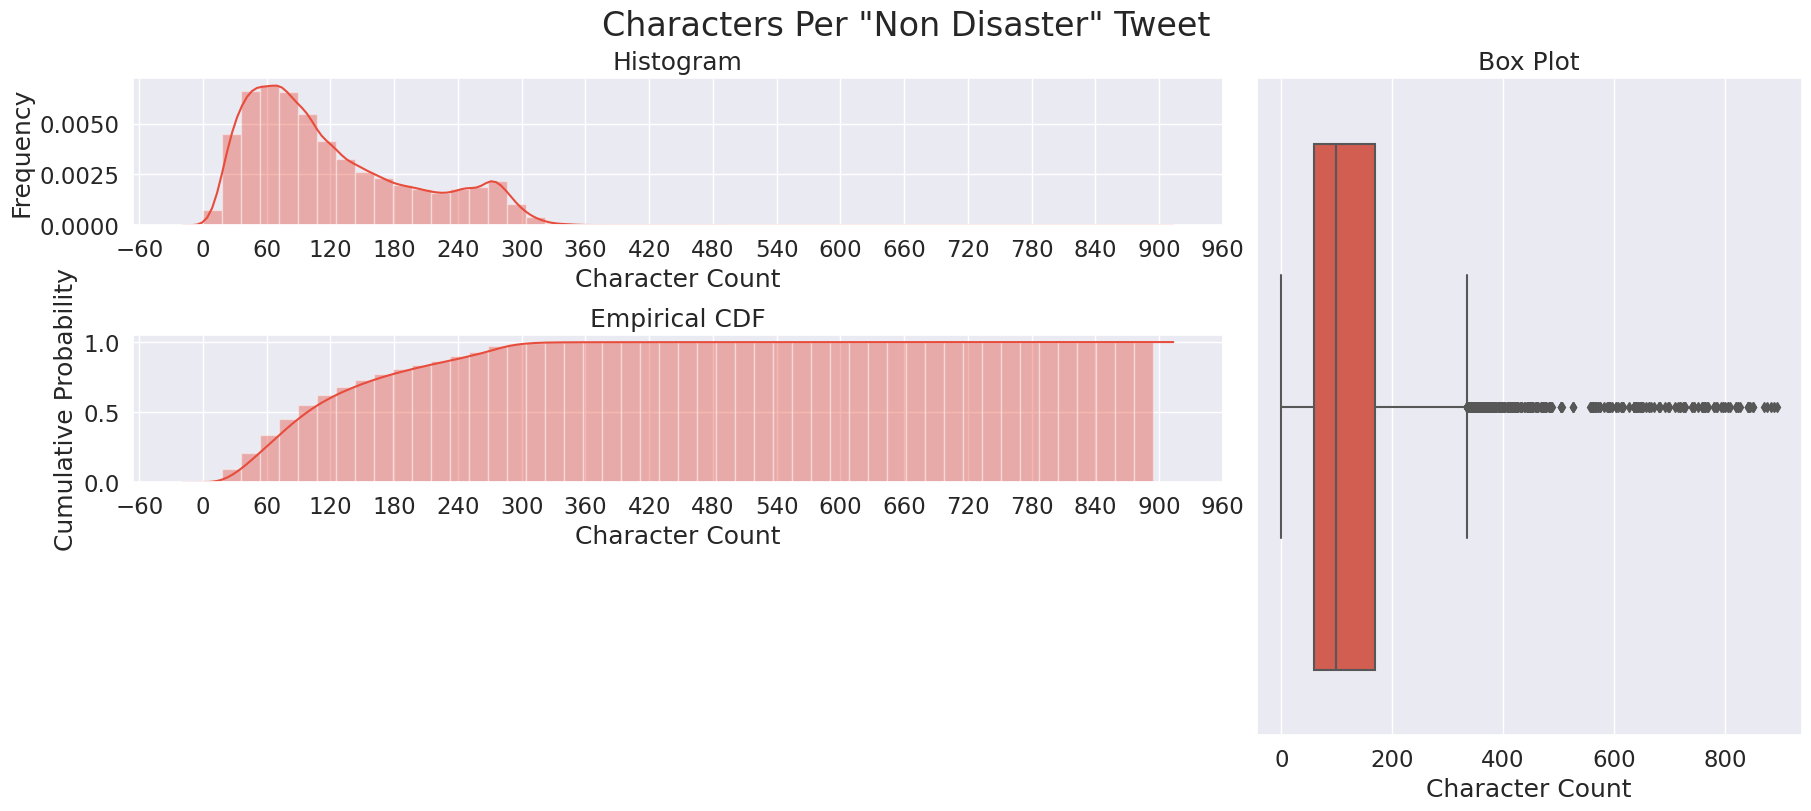

In [34]:
plot_dist3(trainv[trainv['Target'] == 0], 'Character Count',
           'Characters Per "Non Disaster" Tweet')

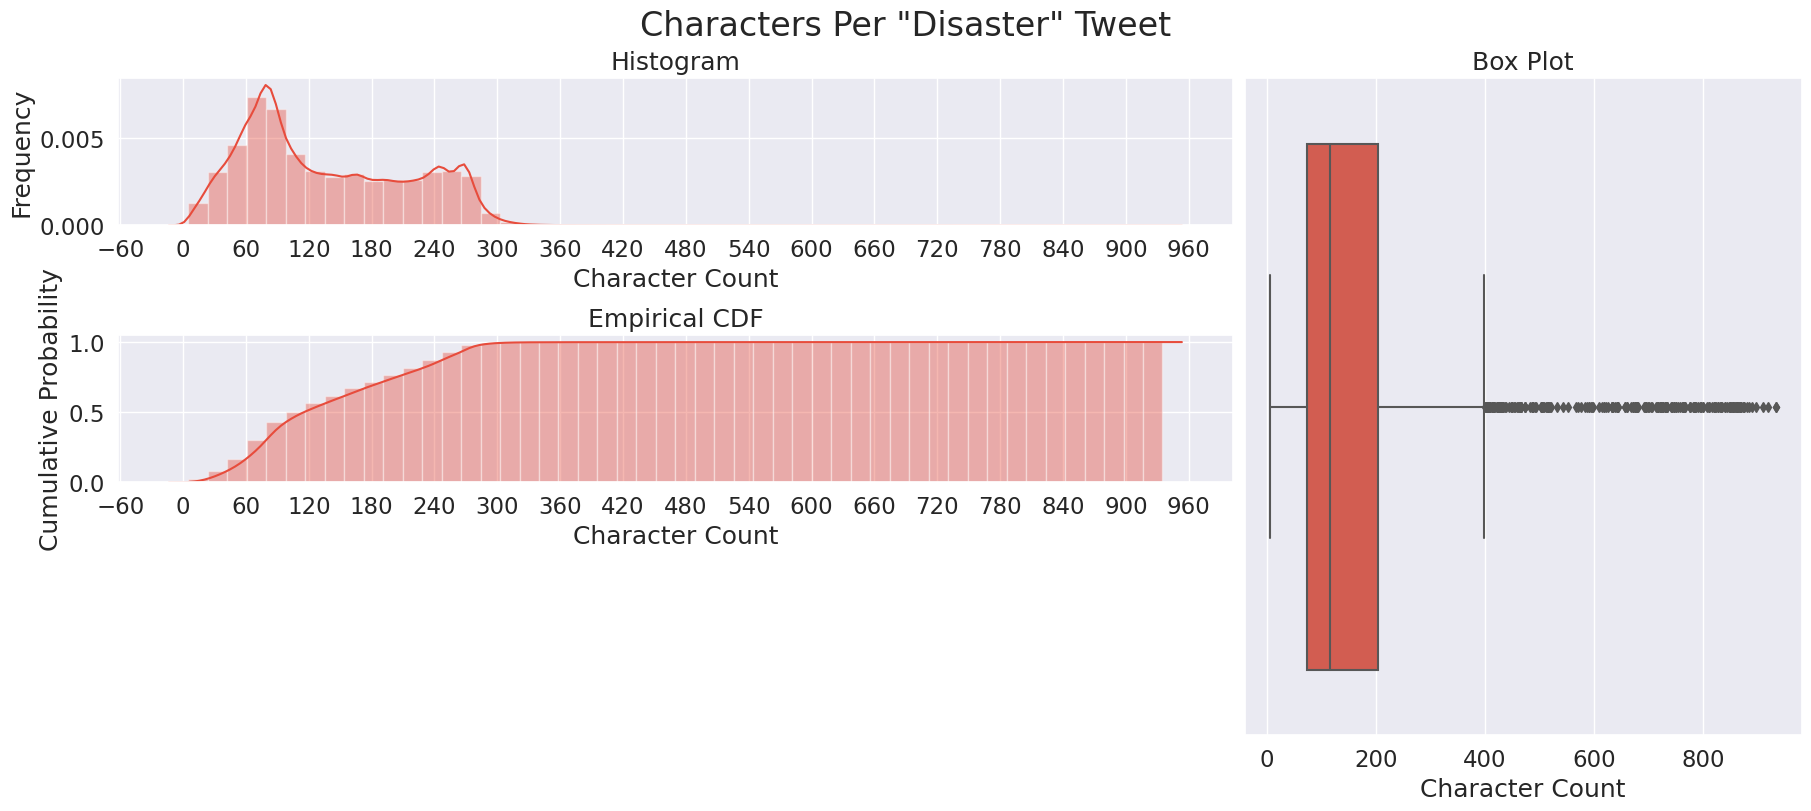

In [35]:
plot_dist3(trainv[trainv['Target'] == 1], 'Character Count',
           'Characters Per "Disaster" Tweet')

Word Counts

In [36]:
def plot_word_number_histogram(textno, textye):
    
    """A function for comparing word counts"""

    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 6), sharey=True)
    sns.distplot(textno.str.split().map(lambda x: len(x)), ax=axes[0], color='#e74c3c')
    sns.distplot(textye.str.split().map(lambda x: len(x)), ax=axes[1], color='#e74c3c')
    
    axes[0].set_xlabel('Word Count')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Non Disaster Tweets')
    axes[1].set_xlabel('Word Count')
    axes[1].set_title('Disaster Tweets')
    
    fig.suptitle('Words Per Tweet', fontsize=24, va='baseline')
    
    fig.tight_layout()

In [37]:
def plot_word_len_histogram(textno, textye):
    
    """A function for comparing average word length"""
    
    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 6), sharey=True)
    sns.distplot(textno.str.split().apply(lambda x: [len(i) for i in x]).map(
        lambda x: np.mean(x)),
                 ax=axes[0], color='#e74c3c')
    sns.distplot(textye.str.split().apply(lambda x: [len(i) for i in x]).map(
        lambda x: np.mean(x)),
                 ax=axes[1], color='#e74c3c')
    
    axes[0].set_xlabel('Word Length')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Non Disaster Tweets')
    axes[1].set_xlabel('Word Length')
    axes[1].set_title('Disaster Tweets')
    
    fig.suptitle('Mean Word Lengths', fontsize=24, va='baseline')
    fig.tight_layout()

Word Lengths

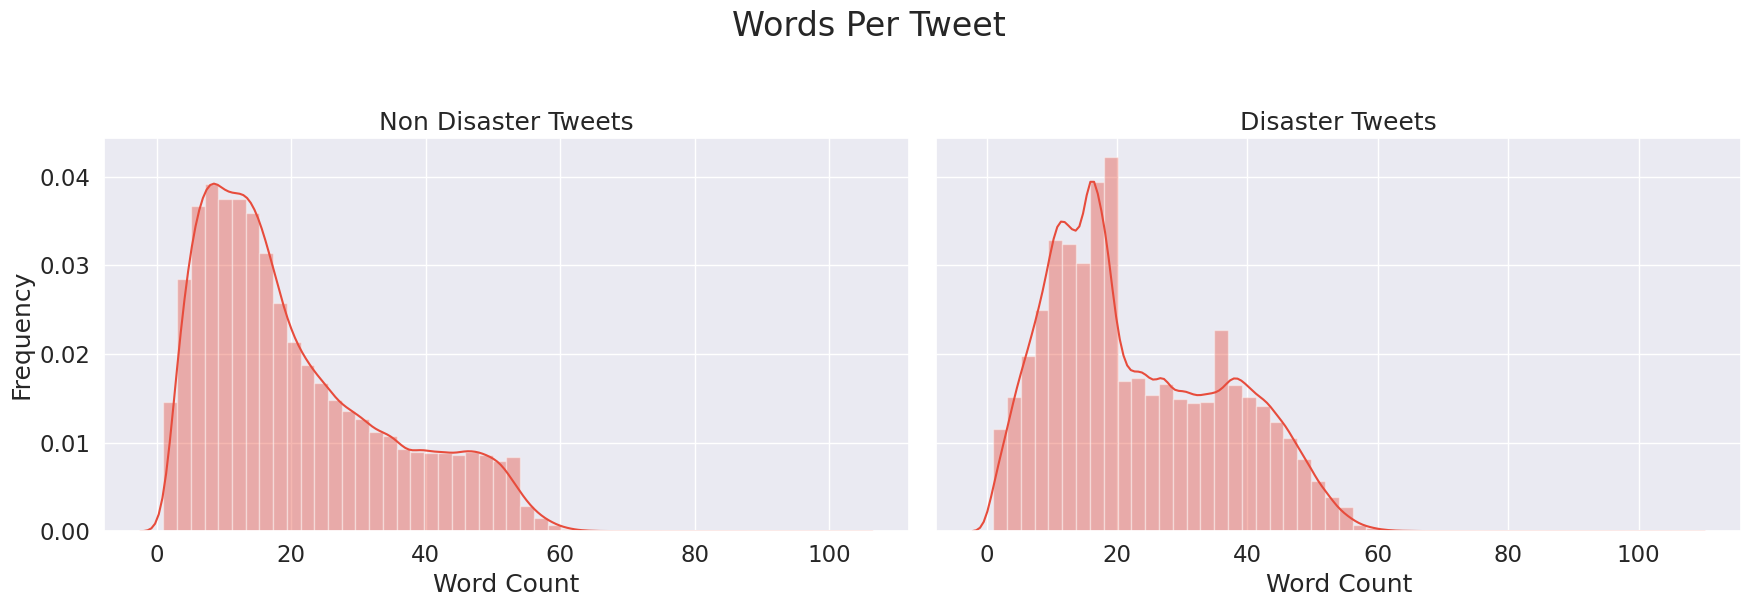

In [38]:
plot_word_number_histogram(trainv[trainv['Target'] == 0]['Tweet'],
                           trainv[trainv['Target'] == 1]['Tweet'])

In [39]:
lis = [
    trainv[trainv['Target'] == 0]['Lemma_str'],
    trainv[trainv['Target'] == 1]['Lemma_str']
]

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes = axes.flatten()

for i, j in zip(lis, axes):
    try:
        new = i.str.split()
        new = new.values.tolist()
        corpus = [word.lower() for i in new for word in i]
        dic = defaultdict(int)
        for word in corpus:
            if word in stop:
                dic[word] += 1

        top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:15]
        x, y = zip(*top)
        df = pd.DataFrame([x, y]).T
        df = df.rename(columns={0: 'Stopword', 1: 'Count'})
        sns.barplot(x='Count', y='Stopword', data=df, palette='plasma', ax=j)
        plt.tight_layout()
    except:
        plt.close()
        print('No stopwords left in texts.')
        break

No stopwords left in texts.


Most Common Words

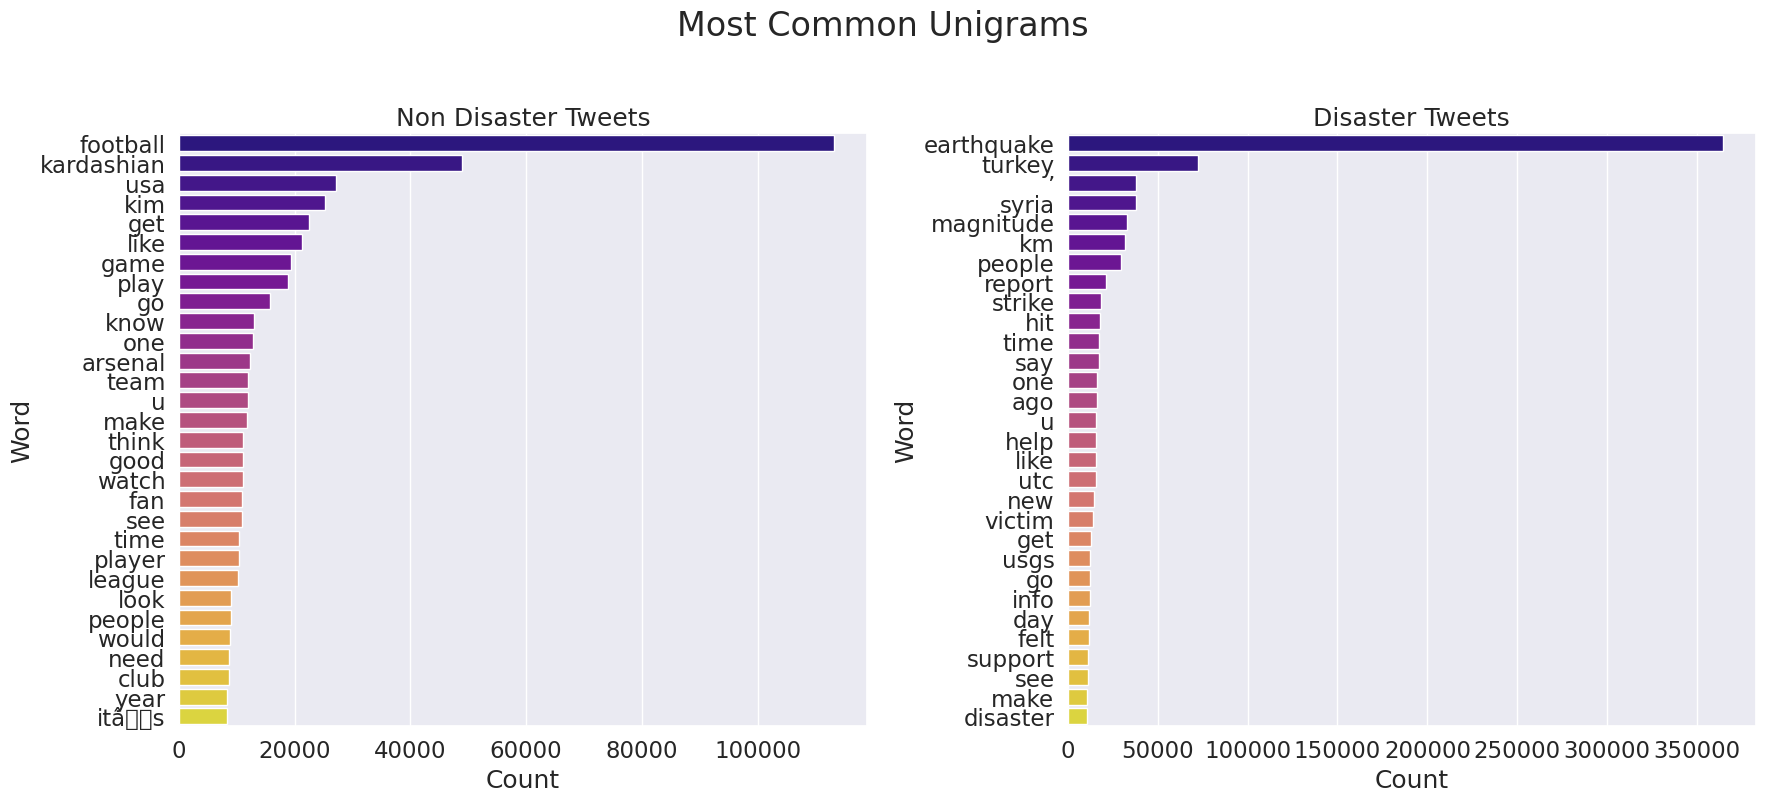

In [41]:
# Displaying most common words.

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes = axes.flatten()

for i, j in zip(lis, axes):

    new = i.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []
    for word, count in most[:30]:
        if (word not in stop):
            x.append(word)
            y.append(count)

    sns.barplot(x=y, y=x, palette='plasma', ax=j)
axes[0].set_title('Non Disaster Tweets')

axes[1].set_title('Disaster Tweets')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Word')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Word')

fig.suptitle('Most Common Unigrams', fontsize=24, va='baseline')
plt.tight_layout()


In [42]:
def ngrams(n, title):
    """A Function to plot most common ngrams"""
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    axes = axes.flatten()
    for i, j in zip(lis, axes):

        new = i.str.split()
        new = new.values.tolist()
        corpus = [word for i in new for word in i]

        def _get_top_ngram(corpus, n=None):
            #getting top ngrams
            vec = CountVectorizer(ngram_range=(n, n),
                                  max_df=0.9,
                                  stop_words='english').fit(corpus)
            bag_of_words = vec.transform(corpus)
            sum_words = bag_of_words.sum(axis=0)
            words_freq = [(word, sum_words[0, idx])
                          for word, idx in vec.vocabulary_.items()]
            words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
            return words_freq[:15]

        top_n_bigrams = _get_top_ngram(i, n)[:15]
        x, y = map(list, zip(*top_n_bigrams))
        sns.barplot(x=y, y=x, palette='plasma', ax=j)
        
        axes[0].set_title('Non Disaster Tweets')
        axes[1].set_title('Disaster Tweets')
        axes[0].set_xlabel('Count')
        axes[0].set_ylabel('Words')
        axes[1].set_xlabel('Count')
        axes[1].set_ylabel('Words')
        fig.suptitle(title, fontsize=24, va='baseline')
        plt.tight_layout()

Most Common Bigrams

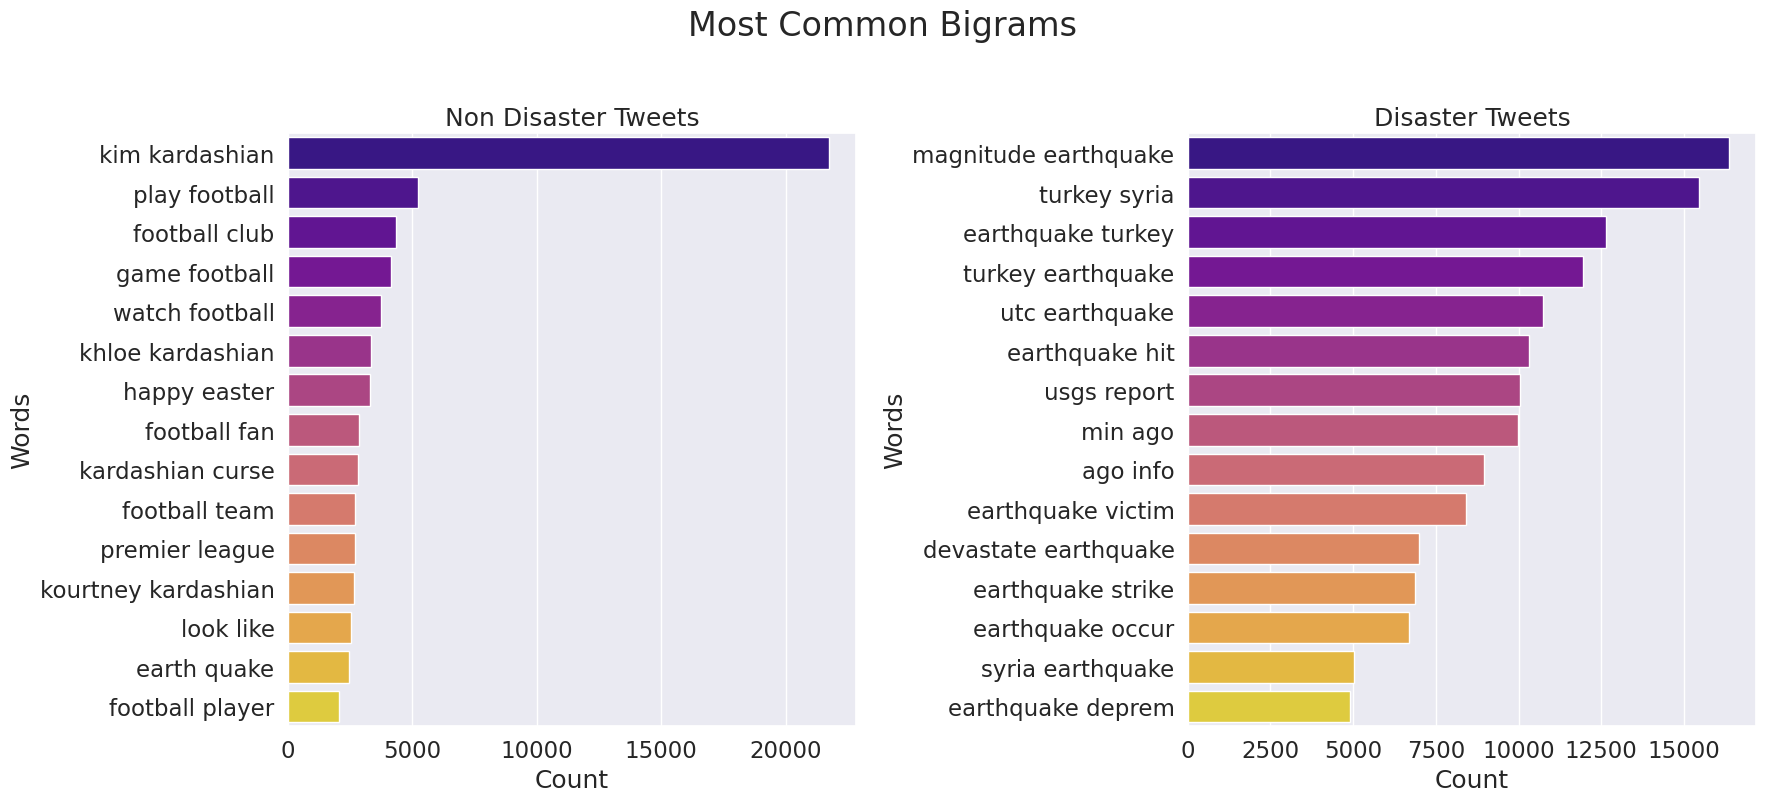

In [43]:
ngrams(2, 'Most Common Bigrams')

Most Common Trigrams

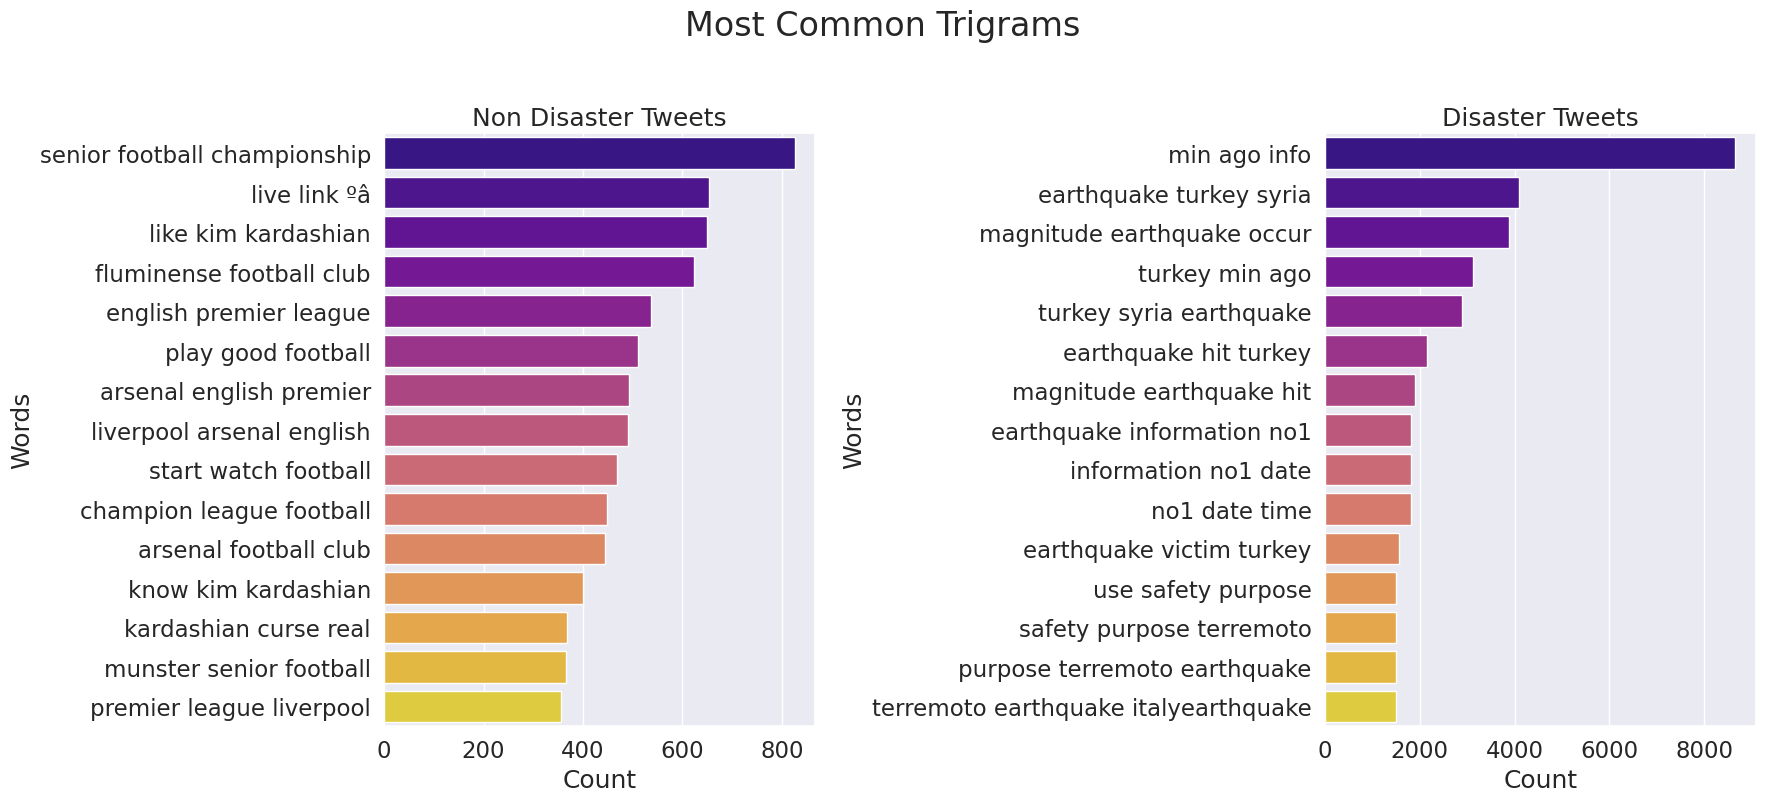

In [44]:
ngrams(3, 'Most Common Trigrams')

In [47]:
trainv.to_csv('/content/drive/MyDrive/train_data1.csv')

In [48]:
testv.to_csv('/content/drive/MyDrive/test_data1.csv')